<a href="https://colab.research.google.com/github/caroalvarezf/Trabajo-Especiliazacion/blob/master/01_PREPARACION_DATOS_06Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/caroalvarezf/Trabajo-Especiliazacion/master/init.py
import init; init.init(force_download=False) 

In [17]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz 
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

#SQL Context
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.types import *
sqlCtx = SQLContext(sc)

In [18]:
import pandas as pd
datos1=pd.read_csv("local/DATA_DEMO.csv", sep=";")
datos2=sqlCtx.createDataFrame(datos1)
type(datos2)

pyspark.sql.dataframe.DataFrame

In [19]:
datos2.show(5)

+--------------+--------------+--------+---------+------------+----+-------------------+--------------+---------+---------+---------+
|CODIGO_CLIENTE|FECHA_CONTACTO|   CANAL|COD_CANAL|COD_SERVICIO|sexo|Fecha de nacimiento|      segmento|producto1|producto2|producto3|
+--------------+--------------+--------+---------+------------+----+-------------------+--------------+---------+---------+---------+
|             1|    19/10/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     3/06/2020|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     2/04/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|    24/04/2019|OFICINAS|        1|           5|   m|          8/01/1974|rentas masivas|       si|       si|       no|
|             1|     1/04/2020|OFICINAS|        1|           5

In [5]:
!git init

Initialized empty Git repository in /content/.git/


# ***1. Identificación de variables***

In [20]:
datos2.printSchema()

root
 |-- CODIGO_CLIENTE: long (nullable = true)
 |-- FECHA_CONTACTO: string (nullable = true)
 |-- CANAL: string (nullable = true)
 |-- COD_CANAL: long (nullable = true)
 |-- COD_SERVICIO: long (nullable = true)
 |-- sexo: string (nullable = true)
 |-- Fecha de nacimiento: string (nullable = true)
 |-- segmento: string (nullable = true)
 |-- producto1: string (nullable = true)
 |-- producto2: string (nullable = true)
 |-- producto3: string (nullable = true)



# ***2. Tratamiento de duplicados***

# ***3. Análisis univariable***

In [21]:
#Calculo de la edad
from datetime import datetime

datosRDD = datos2.rdd
fecha_n = datosRDD.map(lambda x: datetime.strptime(x['Fecha de nacimiento'], '%d/%m/%Y'))

hoy = datetime.now()
edad = fecha_n.map(lambda x: hoy.year - x.year if hoy.month < x.month else hoy.year -x.year - 1)
edad = edad.toDF('INT')
edad.show(3)

+-----+
|value|
+-----+
|   45|
|   45|
|   45|
+-----+
only showing top 3 rows



In [22]:
datos3 = datos2.join(edad)

In [23]:
datos3 = datos3.select(datos3.CODIGO_CLIENTE, datos3.FECHA_CONTACTO, datos3.CANAL, datos3.COD_CANAL, datos3.COD_SERVICIO,
                       datos3.sexo, datos3.segmento, datos3.producto1, datos3.producto2, datos3.producto3, datos3.value.alias("Edad"))
datos3.show()

+--------------+--------------+--------+---------+------------+----+--------------+---------+---------+---------+----+
|CODIGO_CLIENTE|FECHA_CONTACTO|   CANAL|COD_CANAL|COD_SERVICIO|sexo|      segmento|producto1|producto2|producto3|Edad|
+--------------+--------------+--------+---------+------------+----+--------------+---------+---------+---------+----+
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        1|           5|   m|rentas masivas|       si|       si|       no|  45|
|             1|    19/10/2019|OFICINAS|        

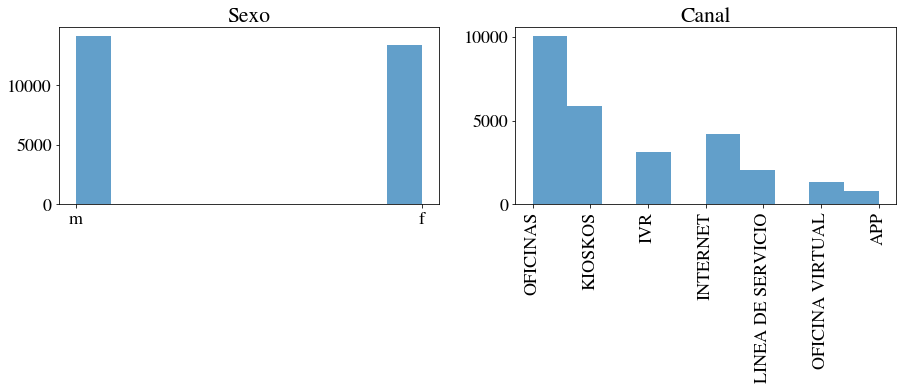

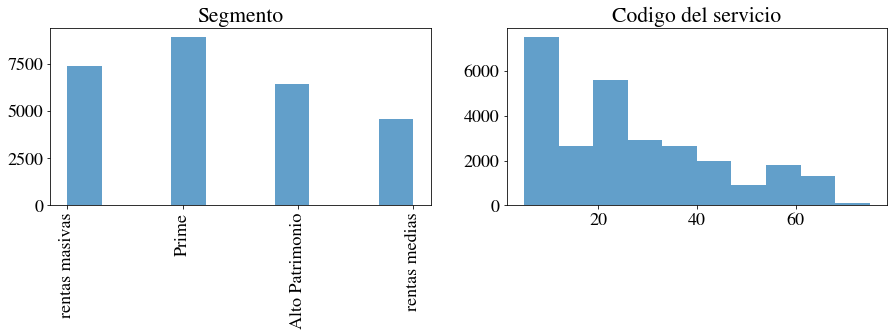

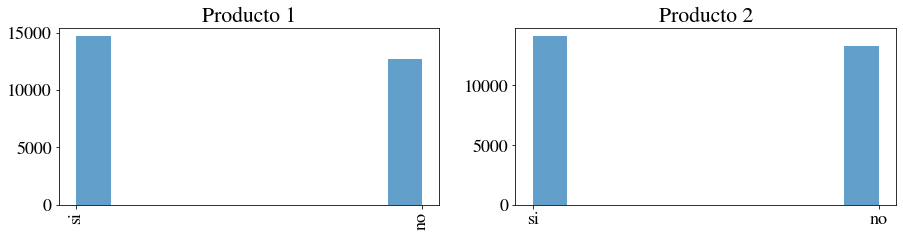

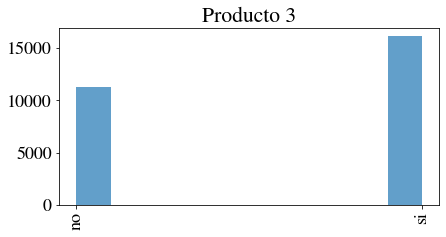

In [10]:
#BD sin eliminar datos atipicos

import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos1['sexo'], alpha=0.7) 
pyplot.title('Sexo')

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos1["CANAL"], alpha=0.7) 
pyplot.title('Canal')
pyplot.xticks(rotation=90)

pyplot.show()

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos1["segmento"], alpha=0.7) 
pyplot.title('Segmento')
pyplot.xticks(rotation=90)

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos1["COD_SERVICIO"], alpha=0.7) 
pyplot.title('Codigo del servicio')


pyplot.show()

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos1["producto1"], alpha=0.7) 
pyplot.title('Producto 1')
pyplot.xticks(rotation=90)

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos1["producto2"], alpha=0.7) 
pyplot.title('Producto 2')


pyplot.show()

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos1["producto3"], alpha=0.7) 
pyplot.title('Producto 3')
pyplot.xticks(rotation=90)


pyplot.show()


In [11]:
import numpy as np

a = datos1['CANAL'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble Canal = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble Canal = 

OFICINAS             10061
KIOSKOS               5855
INTERNET              4226
IVR                   3114
LINEA DE SERVICIO     2048
OFICINA VIRTUAL       1343
APP                    772
Name: CANAL, dtype: int64
Número de datos = 27419


Media nominal = 
 OFICINAS             0.366935
KIOSKOS              0.213538
INTERNET             0.154127
IVR                  0.113571
LINEA DE SERVICIO    0.074693
OFICINA VIRTUAL      0.048981
APP                  0.028156
Name: CANAL, dtype: float64


Varianza nominal = 
 OFICINAS             0.232294
KIOSKOS              0.167940
INTERNET             0.130372
IVR                  0.100673
LINEA DE SERVICIO    0.069114
OFICINA VIRTUAL      0.046582
APP                  0.027363
Name: CANAL, dtype: float64


Desviación nominal = 
 OFICINAS             0.481969
KIOSKOS              0.409804
INTERNET             0.361070
IVR                  0.317289
LINEA DE SERVICIO    0.262895
OFICINA VIRTU

In [12]:
import numpy as np

a = datos1['sexo'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble sexo = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble sexo = 

m    14106
f    13313
Name: sexo, dtype: int64
Número de datos = 27419


Media nominal = 
 m    0.514461
f    0.485539
Name: sexo, dtype: float64


Varianza nominal = 
 m    0.249791
f    0.249791
Name: sexo, dtype: float64


Desviación nominal = 
 m    0.499791
f    0.499791
Name: sexo, dtype: float64


In [13]:
import numpy as np

a = datos1['segmento'].value_counts(normalize = False)
m = datos1.shape[0]
print("Muestras por cada categoría para la vairble Canal = \n")
print(a)
print("Número de datos =",m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("\n")
print("Media nominal = \n",media_nominal)
print("\n")
print("Varianza nominal = \n",varianza_nominal)
print("\n")
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para la vairble Canal = 

Prime              8955
rentas masivas     7404
Alto Patrimonio    6466
rentas medias      4594
Name: segmento, dtype: int64
Número de datos = 27419


Media nominal = 
 Prime              0.326598
rentas masivas     0.270032
Alto Patrimonio    0.235822
rentas medias      0.167548
Name: segmento, dtype: float64


Varianza nominal = 
 Prime              0.219932
rentas masivas     0.197115
Alto Patrimonio    0.180210
rentas medias      0.139476
Name: segmento, dtype: float64


Desviación nominal = 
 Prime              0.468969
rentas masivas     0.443976
Alto Patrimonio    0.424511
rentas medias      0.373464
Name: segmento, dtype: float64


In [39]:
#Convertir variables categóricas a numéricas para identificar correlaciones
datosNUM=datos3
from pyspark.sql.types import *
datosNUM=datosNUM.\
   withColumn('RENTAS MASIVAS',(datosNUM.segmento=='rentas masivas').cast(IntegerType())).\
   withColumn('RENTAS MEDIAS',(datosNUM.segmento=='rentas medias').cast(IntegerType())).\
   withColumn('PRIME',(datosNUM.segmento=='Prime').cast(IntegerType())).\
   withColumn('ALTO PATRIMONIO',(datosNUM.segmento=='Alto Patrimonio').cast(IntegerType())).\
   withColumn('ALTO VALOR',(datosNUM.segmento=='Alto Valor').cast(IntegerType())).\
   withColumn('SEXOInt',(datosNUM.sexo=='f').cast(IntegerType())).\
   withColumn('P1',(datosNUM.producto1=='si').cast(IntegerType())).\
   withColumn('P2',(datosNUM.producto2=='si').cast(IntegerType())).\
   withColumn('P3',(datosNUM.producto3=='si').cast(IntegerType()))

datosNUM=datosNUM.drop('CANAL','sexo', 'segmento', 'producto1', 'producto2', 'producto3', 'FECHA_CONTACTO', 'Fecha de nacimiento')
datosNUM.show(5)

+--------------+---------+------------+----+--------------+-------------+-----+---------------+----------+-------+---+---+---+
|CODIGO_CLIENTE|COD_CANAL|COD_SERVICIO|Edad|RENTAS MASIVAS|RENTAS MEDIAS|PRIME|ALTO PATRIMONIO|ALTO VALOR|SEXOInt| P1| P2| P3|
+--------------+---------+------------+----+--------------+-------------+-----+---------------+----------+-------+---+---+---+
|             1|        1|           5|  45|             1|            0|    0|              0|         0|      0|  1|  1|  0|
|             1|        1|           5|  45|             1|            0|    0|              0|         0|      0|  1|  1|  0|
|             1|        1|           5|  45|             1|            0|    0|              0|         0|      0|  1|  1|  0|
|             1|        1|           5|  45|             1|            0|    0|              0|         0|      0|  1|  1|  0|
|             1|        1|           5|  45|             1|            0|    0|              0|         0|     

In [40]:
#La varibale objetivo es el canal, que esta codificado en la columna COD_CANAL
import six
print("Correlación con la variable objetivo")
for i in datosNUM.columns:
    if not( isinstance(datosNUM.select(i).take(1)[0][0], six.string_types)):
        print( "", i, datosNUM.stat.corr('COD_CANAL',i))

Correlación con la variable objetivo
 CODIGO_CLIENTE -0.10939376945942662
 COD_CANAL 1.0
 COD_SERVICIO -0.3469343155931337
 Edad -1.3930757746949613e-14
 RENTAS MASIVAS 0.027357459910523005
 RENTAS MEDIAS -0.07389203076614874
 PRIME 0.02945695532289857
 ALTO PATRIMONIO 0.0038528940561916303
 ALTO VALOR nan
 SEXOInt -0.02917527647250633
 P1 0.03864550275060398
 P2 0.020265735877491378
 P3 -0.03641509675165462


Las variables que tendran impacto en la predicción de la variable objetivo son aquellas que tienen una correlación alta. La correlación deseada es >0.3, por lo tanto se pueden descartar las variables:

In [44]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = \
    ['CODIGO_CLIENTE', 'COD_SERVICIO','Edad', 'RENTAS MASIVAS', 'RENTAS MEDIAS', 'PRIME', 'ALTO PATRIMONIO', 
     'ALTO VALOR', 'SEXOInt', 'P1', 'P2', 'P3'], outputCol = 'features')
vdatos = vectorAssembler.transform(datosNUM)
vdatos = vdatos.select(['features', 'COD_CANAL'])
vdatos.show(3)

+--------------------+---------+
|            features|COD_CANAL|
+--------------------+---------+
|(12,[0,1,2,3,9,10...|        1|
|(12,[0,1,2,3,9,10...|        1|
|(12,[0,1,2,3,9,10...|        1|
+--------------------+---------+
only showing top 3 rows



In [47]:
from pyspark.ml.stat import Correlation
matrix = Correlation.corr(vdatos,"features")
matrix.collect()[0]["pearson({})".format("features")].values

array([ 1.00000000e+00, -1.62725449e-02,  1.24440829e-12, -7.79498092e-02,
        7.26557047e-02,  4.07487121e-02, -2.74112021e-02,             nan,
        3.43578803e-01, -1.56325435e-01, -1.47502839e-01,  2.43398009e-02,
       -1.62725449e-02,  1.00000000e+00,  1.39701056e-12, -1.17517275e-02,
        5.56021934e-03,  5.99651394e-03,  7.74444865e-04,             nan,
       -1.65569579e-02, -2.00939892e-02, -9.31232790e-03,  2.65071274e-02,
        1.24440829e-12,  1.39701056e-12,  1.00000000e+00,  3.46240264e-13,
        2.55325403e-13,  3.96610767e-13,  3.16331147e-13,             nan,
        5.52924919e-13,  6.12261750e-13,  5.86901295e-13,  6.82393367e-13,
       -7.79498092e-02, -1.17517275e-02,  3.46240264e-13,  1.00000000e+00,
       -2.72863541e-01, -4.23570111e-01, -3.37870404e-01,             nan,
       -1.18822423e-01,  1.33503531e-01, -6.22803661e-02, -2.77997783e-01,
        7.26557047e-02,  5.56021934e-03,  2.55325403e-13, -2.72863541e-01,
        1.00000000e+00, -

Nos interesan las correlaciones inferiores a 0.7 ya que una correlación mayor puede indicar que las varibales nos estan proporcionando información muy parecida

# 4. Tratamiento de outliers y datos nulos

eliminar registros, eliminar variables, imputar, predecir

# 5. Creación del modelo

In [ ]:
(trainingData, testData) = vdatos.randomSplit([0.7, 0.3])
print(trainingData.count())
print(testData.count())